Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Lesson Code:

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# use the 'magic symbol (%) to specify some non-python code (affects the underlying jupyter kernel)
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your notebook.
if you are using another editor, you'll use:
    plt.show()
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your notebook.\nif you are using another editor, you'll use:\n    plt.show()\nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast')
# "fast is actually the default style, so you don't necessarily have to set it."

In [5]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

**Continuous vs. categorical variables**

In [6]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [7]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


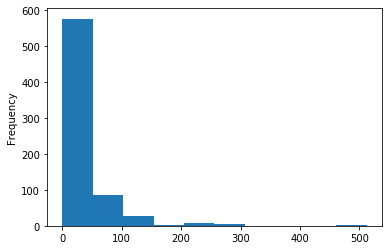

In [8]:
# Fare is a continuous variable, so we can display it with a histogram
df['Fare'].plot(kind='hist');

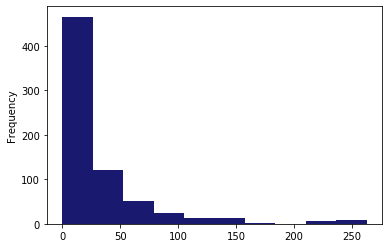

In [11]:
# Remove two extreme outliers
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='midnightblue');

In [12]:
# continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

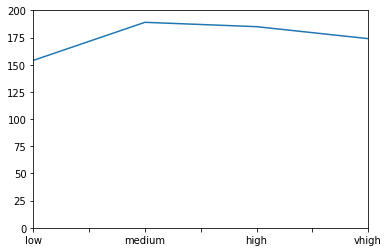

In [15]:
# sometimes it's important to specify the range of your y-axis to get more accurate results
# 'lim' = 'limits'
myresults.plot(ylim=(0,200));

**Display a single continuous variable**

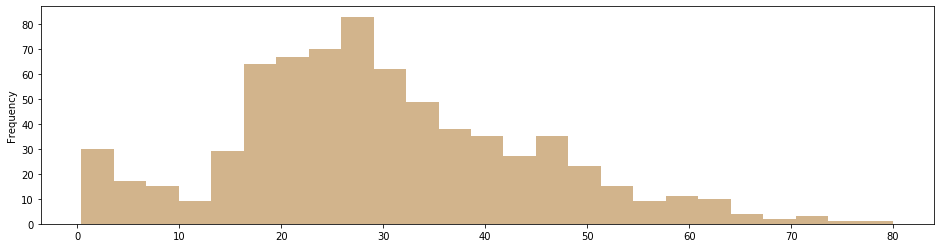

In [16]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');

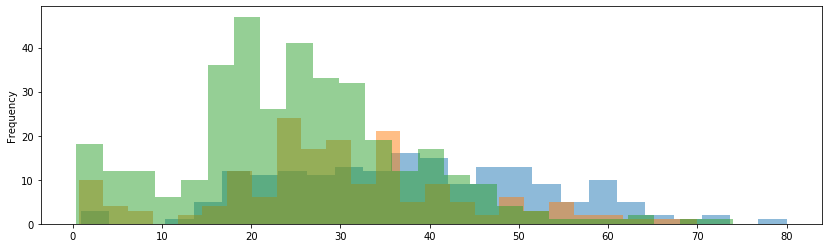

In [18]:
# Stacked Histogram of continuous varable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14, 4), alpha=0.5);

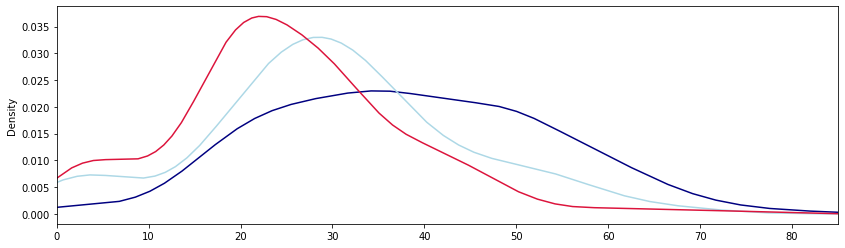

In [20]:
# But this is actually easier to read using a Kernel Density Estimate (KDE).
# Note the use of 'xlim'
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

**Display a single categorical variable**

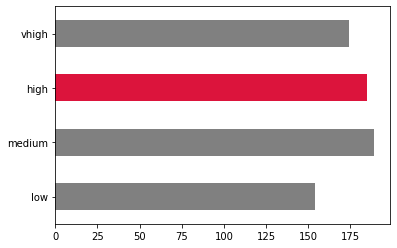

In [23]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

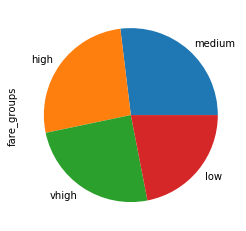

In [24]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4, 4));

**Compare two categorical variables**

In [0]:
# Compare two categorical variables using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

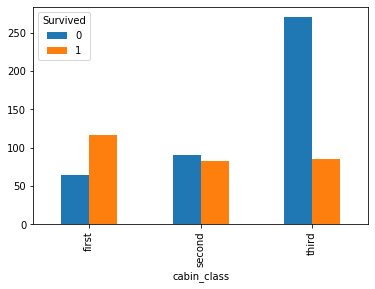

In [26]:
# Make the crosstab into a bar chart.
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents.
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize=True)

In [0]:
# Replicate FiveThirtyEight graph

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here